In [ ]:
!pip install tensorflow

In [6]:
import tensorflow as tf
import pandas as pd
import numpy as np
import os

import matplotlib.pyplot as plt
from PIL import Image

In [2]:
os.getcwd()

'C:\\Users\\jam2208\\Documents\\007_Hackerthon'

In [3]:
img = Image.open('dataset/status/normal/R_001_60_M_01_M0_G0_C0_01.jpg')

In [4]:
print("img : ", img)

img :  <PIL.JpegImagePlugin.JpegImageFile image mode=RGB size=720x1280 at 0x1F4894352B0>


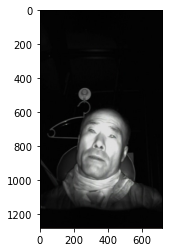

In [5]:
plt.imshow(img)
plt.draw()

In [6]:
img_array = np.array(img)
print("img_array.shape : \n", img_array.shape)

img_array.shape : 
 (1280, 720, 3)


In [7]:
# # resized = img.resize([500,100])
# plt.imshow(resized)
# plt.show()

In [8]:
path = r'C:\Users\jam2208\Documents\007_Hackerthon\dataset\status'

filenames = os.listdir(path)
print("filenames : ", filenames)

filenames :  ['cigar', 'normal', 'phone', 'sleep']


In [9]:
def list_dir(path):
    filenames = os.listdir(path)
    filenames.sort()
    return filenames

In [10]:
target_names = list_dir(path)
print("filenames : ", target_names)

filenames :  ['cigar', 'normal', 'phone', 'sleep']


In [11]:
for dx, dname in enumerate(target_names):
    print("dname : ", dname)
    
    subpath = path + '\\' + dname
    print("subpath : ", subpath)
    
    filenames = list_dir(subpath)
    print("filenames : ", filenames[:3])

dname :  cigar
subpath :  C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\cigar
filenames :  ['R_114_50_M_03_M0_G1_C0_01.jpg', 'R_114_50_M_03_M0_G1_C0_02.jpg', 'R_114_50_M_03_M0_G1_C0_03.jpg']
dname :  normal
subpath :  C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\normal
filenames :  ['R_001_60_M_01_M0_G0_C0_01.jpg', 'R_001_60_M_01_M0_G0_C0_02.jpg', 'R_001_60_M_01_M0_G0_C0_03.jpg']
dname :  phone
subpath :  C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\phone
filenames :  ['001_G1_02_무광원_계기판_통화재현_20200917_182600_02149.jpg', '001_G1_02_무광원_계기판_통화재현_20200917_182600_02170.jpg', '001_G1_02_무광원_네비게이션_통화재현_20200917_182600_03251.jpg']
dname :  sleep
subpath :  C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\sleep
filenames :  ['001_G1_01_무광원_계기판_졸음재현_20200917_182234_02293.jpg', '001_G1_01_무광원_계기판_졸음재현_20200917_182234_02298.jpg', '001_G1_01_무광원_네비게이션_졸음재현_20200917_182234_03298.jpg']


In [12]:
imagepath = os.path.join(subpath, filenames[5])
print("imagepath :", imagepath)

imagepath : C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\sleep\001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02812.jpg


img_array : 
 [[[17 17 17]
  [32 32 32]
  [32 32 32]
  ...
  [21 21 21]
  [22 22 22]
  [48 48 48]]

 [[18 18 18]
  [32 32 32]
  [31 31 31]
  ...
  [24 24 24]
  [17 17 17]
  [66 66 66]]

 [[19 19 19]
  [31 31 31]
  [30 30 30]
  ...
  [23 23 23]
  [22 22 22]
  [46 46 46]]

 ...

 [[11 11 11]
  [20 20 20]
  [22 22 22]
  ...
  [21 21 21]
  [18 18 18]
  [14 14 14]]

 [[14 14 14]
  [27 27 27]
  [26 26 26]
  ...
  [21 21 21]
  [18 18 18]
  [14 14 14]]

 [[14 14 14]
  [27 27 27]
  [23 23 23]
  ...
  [21 21 21]
  [18 18 18]
  [14 14 14]]]


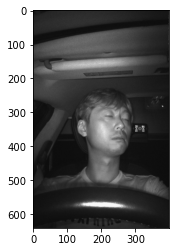

In [105]:
img       = Image.open(imagepath).convert('RGB')
img.save(imagepath)
img_size = img.size
resized   = img.resize([int(img_size[0]*0.5),int(img_size[1]*0.5)]) 
img_array = np.array(resized)

print("img_array : \n", img_array)

plt.imshow(resized)
plt.draw()

In [106]:
img_size[0],img_size[1]

(800, 1280)

In [107]:
def load_image_pixels(imagepath, resolution):
    img         = Image.open(imagepath).convert('RGB')
    img.save(imagepath)
    img_resized = img.resize(resolution)
    print(img_resized)
    return np.array(img_resized)

In [108]:
resolution = [int(img_size[0]*0.5),int(img_size[1]*0.5)]
print(resolution)
print("imagepath :", imagepath)
pixels = load_image_pixels(imagepath, resolution)
print("pixels.shape : ", pixels.shape)

[400, 640]
imagepath : C:\Users\jam2208\Documents\007_Hackerthon\dataset\status\sleep\001_G1_01_무광원_룸미러_졸음재현_20200917_182234_02812.jpg
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38E17C0>
pixels.shape :  (640, 400, 3)


In [109]:
pixels = load_image_pixels(imagepath, resolution)

<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFEE1970>


In [110]:
print(resolution)

[400, 640]


In [111]:
def status_init(resolution):
    
    path = 'dataset/status/'
    target_names = list_dir(path)
    
    images = []
    idxs   = []
    
    for dx, dname in enumerate(target_names):
        print("dname : ", dname)

        subpath = path + '/' + dname
        print("subpath : ", subpath)

        filenames = list_dir(subpath)
        print("filenames : ", filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
            
    xs = np.asarray(images, dtype=np.float32)
    
    return xs, idxs

In [112]:
xs, idxs = status_init(resolution=[int(img_size[0]*0.5),int(img_size[1]*0.5)])

dname :  cigar
subpath :  dataset/status//cigar
filenames :  ['R_114_50_M_03_M0_G1_C0_01.jpg', 'R_114_50_M_03_M0_G1_C0_02.jpg', 'R_114_50_M_03_M0_G1_C0_03.jpg']
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38E9790>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFFA2FA0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38E9790>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38C9D00>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFFA2FA0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38E9700>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFFA2FA0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D43ACC70>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFFA2FA0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D43ACC70>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D38E9790>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4D43ACC70>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFFA2FA0>
<PIL.Image.Image ima

In [113]:
print("xs.shape : ", xs.shape)
print("xs[0].shape : ", xs[0].shape)

xs.shape :  (100, 640, 400, 3)
xs[0].shape :  (640, 400, 3)


In [114]:
np.eye(4)

array([[1., 0., 0., 0.],
       [0., 1., 0., 0.],
       [0., 0., 1., 0.],
       [0., 0., 0., 1.]])

In [115]:
print("np.eye(5)[4] : ", np.eye(4)[3])
print("np.eye(5)[2] : ", np.eye(4)[2])

np.eye(5)[4] :  [0. 0. 0. 1.]
np.eye(5)[2] :  [0. 0. 1. 0.]


In [116]:
def onehot(idxs ,cnt):
    return np.eye(cnt)[idxs]

In [117]:
cnt = len(target_names)
cnt

4

In [118]:
ys = onehot(idxs,cnt)
print(ys)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1.

In [119]:
idxs = 3

In [120]:
def status_init(resolution):
    
    path = 'dataset/status/'
    target_names = list_dir(path)
    
    images = []
    idxs   = []
    
    for dx, dname in enumerate(target_names):
        print("dname : ", dname)

        subpath = path + dname
        print("subpath : ", subpath)

        filenames = list_dir(subpath)
        print("filenames : ", filenames[:3])
        
        for fname in filenames:
            
            if fname[-4:] != '.jpg':
                continue
            imagepath = os.path.join(subpath, fname)
            
            pixels = load_image_pixels(imagepath, resolution)
            
            images.append(pixels)
            idxs.append(dx)
            
    xs = np.asarray(images, dtype=np.float32)
    
    ys = onehot(idxs = idxs , cnt = len(target_names))  
    
    return xs, ys

In [121]:
xs, ys = status_init(resolution=[int(img_size[0]*0.5),int(img_size[1]*0.5)])

dname :  cigar
subpath :  dataset/status/cigar
filenames :  ['R_114_50_M_03_M0_G1_C0_01.jpg', 'R_114_50_M_03_M0_G1_C0_02.jpg', 'R_114_50_M_03_M0_G1_C0_03.jpg']
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE34D60>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE34850>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE346A0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE340D0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4F5C32BE0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE346A0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE34D60>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE340D0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4EFE34850>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4F5CBFF40>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4F5C32BE0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4F5CBFEB0>
<PIL.Image.Image image mode=RGB size=400x640 at 0x1F4F5C32BE0>
<PIL.Image.Image imag

In [122]:
print("xs.shape : ", xs.shape)
print("ys.shape : ", ys.shape)

xs.shape :  (100, 640, 400, 3)
ys.shape :  (100, 4)


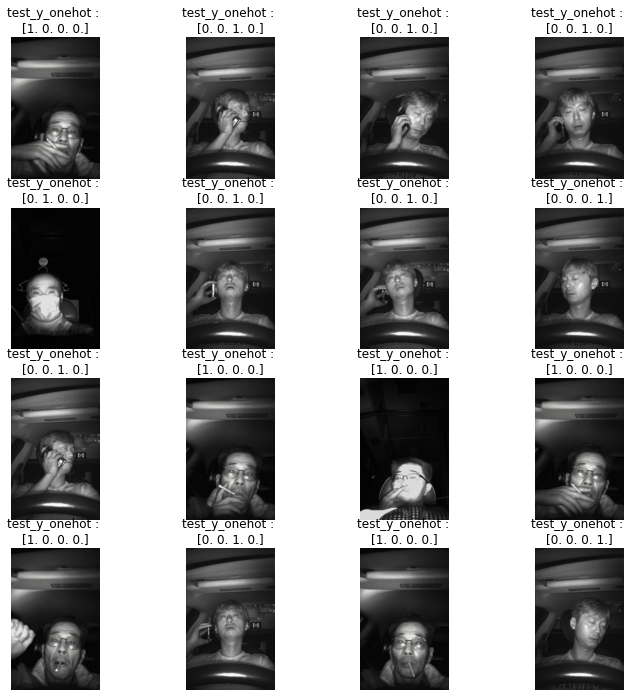

In [123]:
plt.figure(figsize=(12,12))

for i in range(16):
    plt.subplot(4,4, i + 1)
    i = np.random.choice(100)
    img = xs[i]
    img_image = Image.fromarray(np.uint8(img))

    plt.title('test_y_onehot : \n{}'.format(ys[i]))
    plt.axis('off')
    plt.imshow(img_image)

plt.show()

In [124]:
print("xs.min() : ", xs.min())
print("xs.max() : ", xs.max())

xs.min() :  0.0
xs.max() :  255.0


In [125]:
xs_norm = xs / 255.0

In [126]:
print(xs_norm.min())
print(xs_norm.max())

0.0
1.0


In [127]:
shuffle_map = np.arange(xs_norm.shape[0])
np.random.shuffle(shuffle_map)
print("shuffle_map : ", shuffle_map)

shuffle_map :  [35 18 59 49 16 52 20 26 25 93 72 21 84 50 63 55 58 46  7 62 40 28 32 42
 19 66 53  6 37 45 98 75 13 57 60 44 78  3 67 33 68 83 88 34 15 69 89 61
 14 39 99 95  1 11 36 22 17 90 96 51 27  2  5 92 71 94 29  8 43 70  4 41
 65 48 12 24 76 97 73 56 81 31  9 86 38 23 64  0 82 47 30 10 80 77 87 74
 91 85 54 79]


In [128]:
train_ratio = 0.8

test_begin_index = int(xs_norm.shape[0] * train_ratio)
print("test_begin_index :", test_begin_index)

test_begin_index : 80


In [129]:
train_x = xs_norm[shuffle_map[:test_begin_index]]
train_y = ys[shuffle_map[:test_begin_index]]

test_x  = xs_norm[shuffle_map[test_begin_index:]]
test_y  = ys[shuffle_map[test_begin_index:]] 

In [130]:
print("train_x.shape : ", train_x.shape)
print("train_y.shape : ", train_y.shape)
print("test_x.shape : ", test_x.shape)
print("test_y.shape : ", test_y.shape)

train_x.shape :  (80, 640, 400, 3)
train_y.shape :  (80, 4)
test_x.shape :  (20, 640, 400, 3)
test_y.shape :  (20, 4)


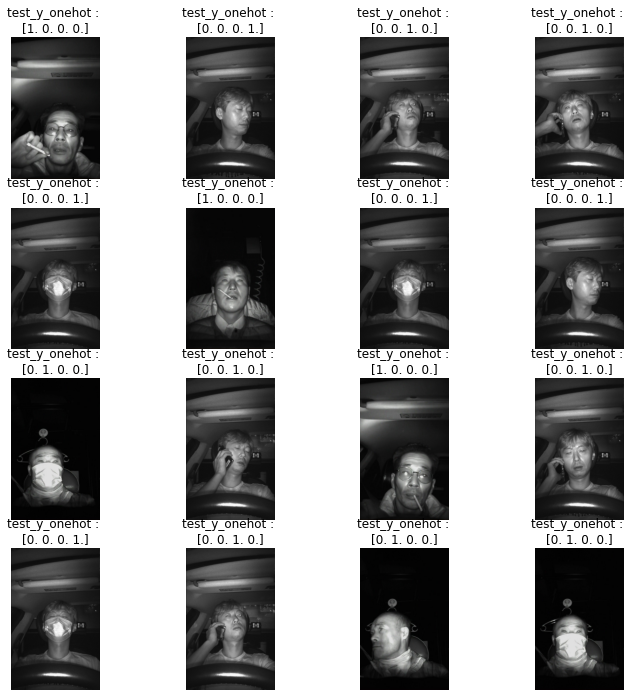

In [131]:
plt.figure(figsize=(12,12))

for i in range(16):
    plt.subplot(4,4, i + 1)
    i = np.random.choice(80)
    img = train_x[i]
    
    #img_image = Image.fromarray(np.uint8(img))

    plt.title('test_y_onehot : \n{}'.format(train_y[i]))
    plt.axis('off')
    plt.imshow(img)

plt.show()

In [39]:
model_0 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(int(img_size[0]*0.5),int(img_size[1]*0.5),3),kernel_size=(3,3),
    filters=16, strides = (1,1),padding = 'valid'),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=32),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=64),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dense(units=4, activation = 'softmax')
])

In [40]:
model_0.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 398, 638, 16)      448       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 396, 636, 32)      4640      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 394, 634, 64)      18496     
_________________________________________________________________
flatten (Flatten)            (None, 15986944)          0         
_________________________________________________________________
dense (Dense)                (None, 128)               2046328960
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 516       
Total params: 2,046,353,060
Trainable params: 2,046,353,060
Non-trainable params: 0
______________________________________

In [132]:
model_1 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(int(img_size[0]*0.5),int(img_size[1]*0.5),3),kernel_size=(3,3),filters=32),
    tf.keras.layers.MaxPool2D(strides = (2,2),pool_size=(2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters = 64),
    tf.keras.layers.AvgPool2D(strides = (2,2)),
    tf.keras.layers.Conv2D(kernel_size=(3,3),filters=128),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.3),
    tf.keras.layers.Dense(units=4, activation = 'softmax')
])

In [133]:
model_1.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 398, 638, 32)      896       
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 199, 319, 32)      0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 197, 317, 64)      18496     
_________________________________________________________________
average_pooling2d_2 (Average (None, 98, 158, 64)       0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 96, 156, 128)      73856     
_________________________________________________________________
flatten_4 (Flatten)          (None, 1916928)           0         
_________________________________________________________________
dense_9 (Dense)              (None, 128)              

In [43]:
model_2 = tf.keras.Sequential([
    tf.keras.layers.Conv2D(input_shape=(int(img_size[0]*0.5),int(img_size[1]*0.5),3),kernel_size=(3,3),filters=32,padding='same',activation='relu'),
    tf.keras.layers.Conv2D(input_shape=(int(img_size[0]*0.5),int(img_size[1]*0.5),32),kernel_size=(3,3),filters=64,padding='same',activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 128, padding = 'same', activation='relu'),
    tf.keras.layers.Conv2D(kernel_size=(3,3), filters = 256, padding = 'valid', activation='relu'),
    tf.keras.layers.MaxPool2D(strides = (2,2)),
    tf.keras.layers.Dropout(rate=0.5),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(units=512, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=256, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.5),
    tf.keras.layers.Dense(units=4, activation = 'softmax')
])

In [44]:
model_2.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_6 (Conv2D)            (None, 400, 640, 32)      896       
_________________________________________________________________
conv2d_7 (Conv2D)            (None, 400, 640, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 200, 320, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 200, 320, 64)      0         
_________________________________________________________________
conv2d_8 (Conv2D)            (None, 200, 320, 128)     73856     
_________________________________________________________________
conv2d_9 (Conv2D)            (None, 198, 318, 256)     295168    
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 99, 159, 256)     

In [134]:
model_1.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.00001),
                loss = 'categorical_crossentropy',
                metrics = [tf.keras.metrics.TruePositives(name = 'TP'),
                           tf.keras.metrics.FalsePositives(name ='FP')])

In [135]:
history = model_1.fit(train_x, train_y,
                      epochs = 50,
                      batch_size = 20,
                      validation_split = 0.2)

Epoch 1/50
4/4 [==============================] - 14s 3s/step - loss: 1.2847 - TP: 11.0000 - FP: 16.0000 - val_loss: 0.6418 - val_TP: 11.0000 - val_FP: 5.0000
Epoch 2/50
4/4 [==============================] - 13s 3s/step - loss: 0.6301 - TP: 41.0000 - FP: 18.0000 - val_loss: 0.3004 - val_TP: 14.0000 - val_FP: 2.0000
Epoch 3/50
4/4 [==============================] - 12s 3s/step - loss: 0.3415 - TP: 56.0000 - FP: 8.0000 - val_loss: 0.2541 - val_TP: 15.0000 - val_FP: 1.0000
Epoch 4/50
4/4 [==============================] - 13s 3s/step - loss: 0.2838 - TP: 57.0000 - FP: 7.0000 - val_loss: 0.2248 - val_TP: 14.0000 - val_FP: 2.0000
Epoch 5/50
4/4 [==============================] - 13s 3s/step - loss: 0.3379 - TP: 53.0000 - FP: 11.0000 - val_loss: 0.1898 - val_TP: 15.0000 - val_FP: 1.0000
Epoch 6/50
4/4 [==============================] - 13s 3s/step - loss: 0.2941 - TP: 55.0000 - FP: 8.0000 - val_loss: 0.4066 - val_TP: 11.0000 - val_FP: 5.0000
Epoch 7/50
4/4 [==============================] -

In [143]:
model_1.save('status_init_1.h5')

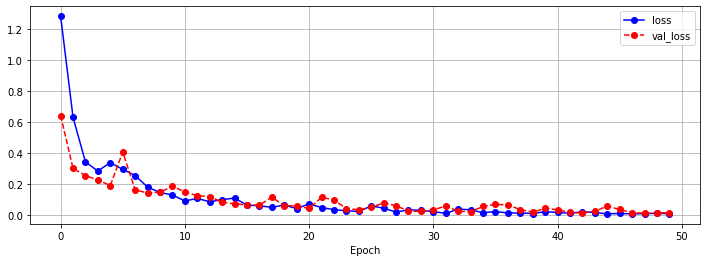

In [136]:
plt.figure(figsize = (12,4))

plt.plot(history.history['loss'],    'b-o', label = 'loss')
plt.plot(history.history['val_loss'],'r--o',label = 'val_loss')
plt.xlabel('Epoch')

plt.grid()
plt.legend()
plt.show()

In [137]:
model_1.evaluate(test_x,test_y)

1/1 [==============================] - 1s 870ms/step - loss: 0.0236 - TP: 20.0000 - FP: 0.0000e+00


[0.02358696237206459, 20.0, 0.0]

In [139]:
pred_y = model_1.predict(test_x)

In [140]:
np.round(pred_y,3 )

array([[0.   , 0.   , 0.071, 0.929],
       [0.   , 1.   , 0.   , 0.   ],
       [0.993, 0.006, 0.   , 0.   ],
       [0.   , 0.   , 0.095, 0.905],
       [0.   , 1.   , 0.   , 0.   ],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.994, 0.006],
       [1.   , 0.   , 0.   , 0.   ],
       [0.   , 0.   , 0.065, 0.935],
       [0.   , 1.   , 0.   , 0.   ],
       [0.   , 1.   , 0.   , 0.   ],
       [0.991, 0.005, 0.003, 0.001],
       [0.   , 0.   , 0.016, 0.984],
       [0.   , 0.   , 0.017, 0.983],
       [0.   , 0.   , 0.044, 0.955],
       [0.   , 0.   , 1.   , 0.   ],
       [0.001, 0.   , 0.006, 0.994],
       [0.   , 0.   , 0.097, 0.903],
       [0.   , 0.   , 1.   , 0.   ],
       [0.   , 0.   , 0.021, 0.979]], dtype=float32)

pred_y_0 -> 3
test_y_0 -> 3
Prob : [0.    0.    0.071 0.929]


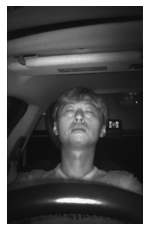

In [141]:
test_index = 0

print("pred_y_{} -> {}".format(test_index, np.argmax(pred_y[test_index])))
print("test_y_{} -> {}".format(test_index, np.argmax(test_y[test_index])))

print("Prob : {}".format(np.round(pred_y[test_index],3)))

img = test_x[test_index]

plt.imshow(img)
plt.axis('off')
plt.show()

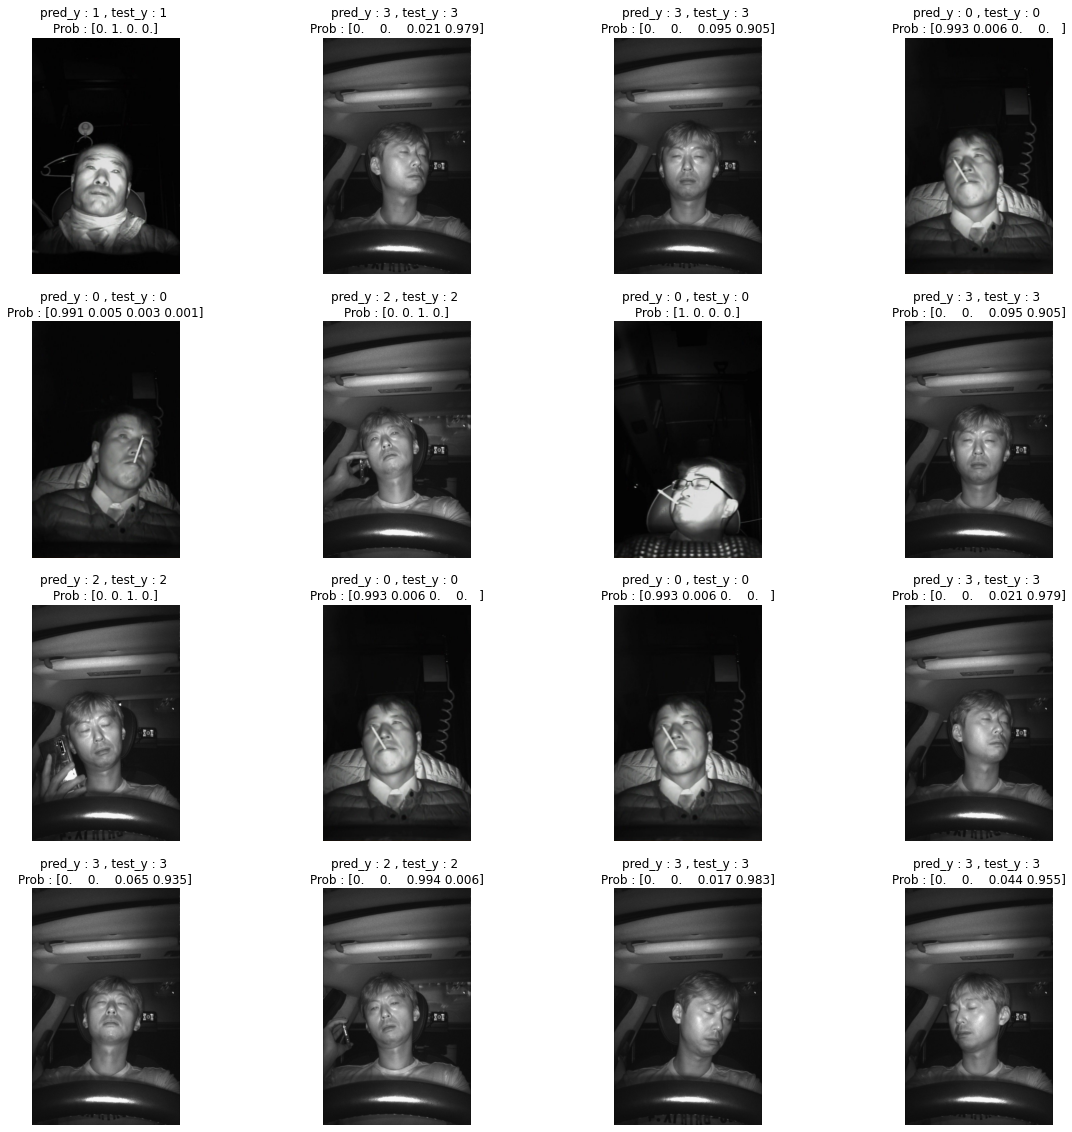

In [142]:
plt.figure(figsize=(20,20))

for i in range(16):
    
    plt.subplot(4,4,i+1)
    
    i = np.random.choice(20)
    img = test_x[i]
    plt.imshow(img)
    
    plt.title('pred_y : {} , test_y : {} \nProb : {}'.format(np.argmax(pred_y[i]), np.argmax(test_y[i]), np.round(pred_y[i],3)))
    plt.axis('off')

plt.draw()

In [9]:
import numpy as np
import cv2
# from PIL import Image

# 영상 촬영 장치와 연결하기
capture = cv2.VideoCapture(0, cv2.CAP_DSHOW)

# 영상의 Width와 Height 크기조절
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1024)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 768)

while True:
    if cv2.waitKey(10) > 0: 
        break

    ret, frame = capture.read()

    green_color = (0, 255, 0)
    frame = cv2.rectangle(frame,(332, 128),(692, 768),green_color, 3)
#     print(ret, frame)
    # 영상을 한 프레임씩 읽어온다. 
    # ret:프레임 제대로 읽었는지 확인,정상이면 True이 출력된다.
    # frame: 읽은 프레임이 출력됨(이미지)
#     frame_image = Image.fromarray(frame)
#     src = cv2.imread(frame_image, cv2.IMREAD_COLOR)
#     frame_cropped = src[332:128, 692:768].copy()

    cv2.putText(frame,'test',(0,100), cv2.FONT_HERSHEY_PLAIN,3,(255,255,255))
    #영상에 텍스트를 삽입한다.(넣을영상,넣을텍스트,텍스트위치(x,y),폰트명,폰트크기,색상(R,G,B))
    cv2.imshow("camera test", frame)
    #영상을 출력한다.
    
capture.release()
cv2.destroyAllWindows()

# r, frame = capture.read()
# ...
# print('Resolution: ' + str(frame.shape[0]) + ' x ' + str(frame.shape[1]))

In [4]:
frame.shape

(768, 1024, 3)

In [ ]:
frame[312:712, 128:768].shape

In [12]:
def preprocessing(frame):
    cropped_frame = frame[312:712, 128:768]
    #frame_fliped = cv2.flip(frame, 1)
    # 사이즈 조정 티쳐블 머신에서 사용한 이미지 사이즈로 변경해준다.
    size = (224, 224)
    frame_resized = cv2.resize(cropped_frame, size, interpolation=cv2.INTER_AREA)
#     frame_resized = frame[312:712, 128:768]
    
    # 이미지 정규화
    # astype : 속성
    frame_normalized = (frame_resized.astype(np.float32) / 255.0)

    # 이미지 차원 재조정 - 예측을 위해 reshape 해줍니다.
    # vgg16 모델에 공급할 올바른 모양의 배열 생성
    frame_reshaped = frame_normalized.reshape((1, 224, 224, 3))
    #print(frame_reshaped)
    return frame_reshaped

In [13]:
preprocessed = preprocessing(frame)
print(preprocessed)
preprocessed.shape

[[[[0.5137255  0.5411765  0.5254902 ]
   [0.41960785 0.42745098 0.39607844]
   [0.36862746 0.3764706  0.3254902 ]
   ...
   [0.4862745  0.75686276 0.9098039 ]
   [0.49019608 0.7137255  0.85882354]
   [0.22352941 0.34509805 0.46666667]]

  [[0.44313726 0.47058824 0.44705883]
   [0.45882353 0.46666667 0.43529412]
   [0.38431373 0.3882353  0.3529412 ]
   ...
   [0.49019608 0.7490196  0.90588236]
   [0.32941177 0.49019608 0.6313726 ]
   [0.27058825 0.34117648 0.44705883]]

  [[0.6745098  0.7254902  0.7058824 ]
   [0.49019608 0.50980395 0.47843137]
   [0.38039216 0.3882353  0.34509805]
   ...
   [0.42745098 0.67058825 0.83137256]
   [0.24705882 0.35686275 0.47058824]
   [0.29803923 0.34901962 0.44313726]]

  ...

  [[0.2784314  0.27058825 0.49019608]
   [0.7607843  0.7529412  0.84313726]
   [0.88235295 0.88235295 0.8392157 ]
   ...
   [0.54901963 0.5686275  0.5058824 ]
   [0.         0.08235294 0.08235294]
   [0.         0.08627451 0.11372549]]

  [[0.49019608 0.49411765 0.6156863 ]
   [0.8

(1, 224, 224, 3)

In [14]:
def predict(frame):
    prediction = model.predict(frame)
    return prediction

In [ ]:
import tensorflow.keras
import numpy as np
import cv2

In [ ]:
model_filename = r'C:\Users\jam2208\Documents\007_Hackerthon\status_init_1.h5'

In [ ]:
model = tensorflow.keras.models.load_model(model_filename)

In [ ]:
prediction = predict(preprocessed)
print(prediction)

In [ ]:
prediction[0,0]

In [ ]:
max(prediction[0])

In [152]:
import tensorflow.keras
import numpy as np
import cv2

# 모델 위치
model_filename = r'C:\Users\jam2208\Documents\007_Hackerthon\status_init_1.h5'

# 케라스 모델 가져오기
model = tensorflow.keras.models.load_model(model_filename)

# 카메라를 제어할 수 있는 객체
capture = cv2.VideoCapture(0)

# 카메라 길이 너비 조절
capture.set(cv2.CAP_PROP_FRAME_WIDTH, 1024)
capture.set(cv2.CAP_PROP_FRAME_HEIGHT, 768)

# 이미지 처리하기
def preprocessing(frame):
    #frame_fliped = cv2.flip(frame, 1)
    # 사이즈 조정 티쳐블 머신에서 사용한 이미지 사이즈로 변경해준다.
    frame_resized = frame[312:712, 128:768]
    
    # 이미지 정규화
    # astype : 속성
    frame_normalized = (frame_resized.astype(np.float32) / 127.0) - 1

    # 이미지 차원 재조정 - 예측을 위해 reshape 해줍니다.
    # keras 모델에 공급할 올바른 모양의 배열 생성
    frame_reshaped = frame_normalized.reshape((1, 400, 640, 3))
    #print(frame_reshaped)
    return frame_reshaped

# 예측용 함수
def predict(frame):
    prediction = model.predict(frame)
    return prediction

while True:
    ret, frame = capture.read()
    
    frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    green_color = (0, 255, 0)
    frame = cv2.rectangle(frame,(332, 128),(692, 768),green_color, 3)

    if cv2.waitKey(100) > 0: 
        break

    preprocessed = preprocessing(frame)
    prediction = predict(preprocessed)

    if max(prediction[0]) == prediction[0][0]:
        print('Cigar')
        cv2.putText(frame, 'Cigar', (0, 100), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 0, 255))

    elif max(prediction[0]) == prediction[0][1]:
        print('Normal')
        cv2.putText(frame, 'Normal', (0, 100), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 255, 0))
        
    elif max(prediction[0]) == prediction[0][2]:
        print('Phone')
        cv2.putText(frame, 'Phone', (0, 100), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 0, 255))
        
    else:
        print('Sleep')
        cv2.putText(frame, 'Sleep', (0, 100), cv2.FONT_HERSHEY_TRIPLEX, 3, (0, 0, 255))

    cv2.imshow("VideoFrame", frame)
    
capture.release()
cv2.destroyAllWindows()

ValueError: cannot reshape array of size 256000 into shape (1,400,640,3)